#TEXT MINING AND SEARCH 
EXPLORATION 

In [ ]:
import pandas as pd                  
import numpy as np                  
import string                        
import re                            
from matplotlib import pyplot as plt 
from matplotlib import cm
from imblearn.over_sampling import SMOTE
from collections import OrderedDict
import seaborn as sns                
from pprint import pprint            
from collections import Counter     
from wordcloud import WordCloud      
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
        
import nltk
from nltk.corpus import stopwords            
from nltk.stem import PorterStemmer          
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer      

from sklearn.feature_extraction.text import CountVectorizer      
from sklearn.feature_extraction.text import TfidfVectorizer      
from sklearn.decomposition import TruncatedSVD                             
from sklearn.model_selection import train_test_split             
from sklearn.metrics import classification_report                 
from sklearn.ensemble import RandomForestClassifier              
from sklearn.cluster import KMeans                               
from sklearn.metrics import confusion_matrix                     
from sklearn.metrics.cluster import normalized_mutual_info_score 
from sklearn.cluster import DBSCAN                               
from sklearn.cluster import AgglomerativeClustering              
from sklearn.neighbors import KNeighborsClassifier               
from scipy.sparse import random as sparse_random
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC  

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For the first part of the project we develop an explanotary phase where we describe the dataset, we chech the rpesence of Nan values, we delete the duplicates (choices by the text and UserID) and select only the most important features. 
One of the major is that the dataset is unbalance, so we create 5 samples for each type of score (one star, two stras etc.) with 30000 reviews.  

In [ ]:
amazon = pd.read_csv('/content/drive/MyDrive/Text_mining_and_search /Reviews.csv')    
amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
print("numbers of record: " + str(len(amazon)))
amazon.info()

numbers of record: 568454
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
#CHECK NA VALUES 
amazon.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
amazon.describe()
#summary

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
#DROP DUPLICATES  
amazon = amazon.drop_duplicates(subset = {"UserId", "ProfileName","Time","Text"})

In [ ]:
#FEATURE SELECTION 
# prendo in considerazione solo quello che mi serve
amazon = amazon.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator', 'HelpfulnessDenominator','Time','Summary'], axis = 1)

In [ ]:
print("numero di record: " + str(len(amazon)))

numero di record: 393933


Text(0, 0.5, 'Frequenza')

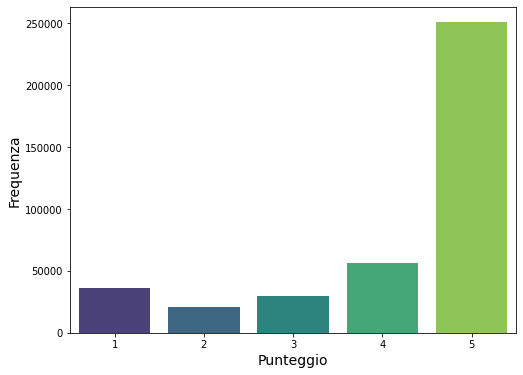

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(amazon["Score"],palette="viridis")
plt.xlabel("Punteggio", size = 14)
plt.ylabel("Frequenza", size = 14)
#THE DATASET IS UNBALANCED, IT IS MANDATORY TO BALANCED THE SCORES TO APPLY A SUPERVISIONATED APPROACH 

In [ ]:
print(amazon['Score'].loc[amazon['Score'] == 1 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 2 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 3 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 4 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 5 ].sum())

36306
41604
89307
224376
1254810


In [ ]:
#BALANCING
#we have selected 30000 rows with a single score value and we concatenate the five varaibles to obtain an unique dataframe
fraud1_df = amazon.loc[amazon['Score'] == 1].sample(n=25000,random_state=42, replace = True)
fraud2_df = amazon.loc[amazon['Score'] == 2].sample(n=25000,random_state=42, replace = True)
fraud3_df = amazon.loc[amazon['Score'] == 3].sample(n=50000,random_state=42, replace = True)
fraud4_df = amazon.loc[amazon['Score'] == 4].sample(n=25000,random_state=42, replace = True)
fraud5_df = amazon.loc[amazon['Score'] == 5].sample(n=25000,random_state=42, replace = True)

In [ ]:
amazon = pd.concat([fraud1_df,fraud2_df,fraud3_df,fraud4_df,fraud5_df])

Text(0, 0.5, 'Frequenza')

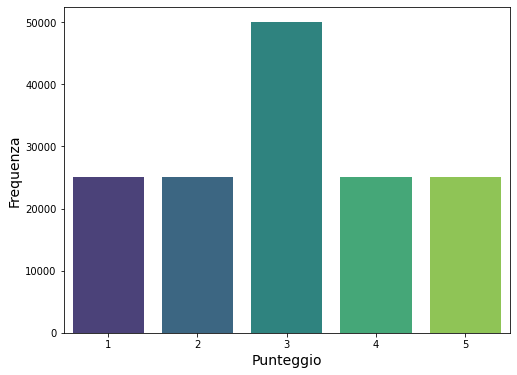

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(amazon["Score"],palette="viridis")
plt.xlabel("Punteggio", size = 14)
plt.ylabel("Frequenza", size = 14)
#THE DATASET RESULTS MORE BALANCED

Text(0, 0.5, 'Frequenza')

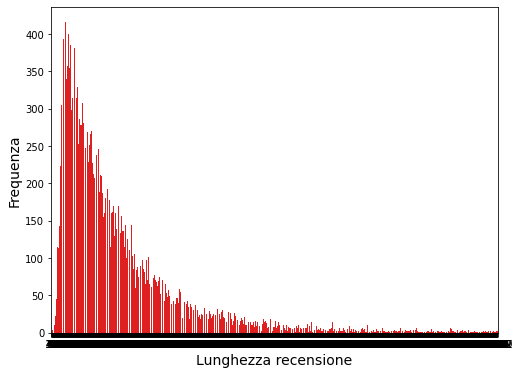

In [ ]:
amazon['len_text'] = amazon['Text'].str.len()
plt.figure(figsize = (8, 6))
plt.xticks(rotation=90)
sns.countplot(amazon["len_text"],color="red")
plt.xlabel("Lunghezza recensione", size = 14)
plt.ylabel("Frequenza", size = 14)

In [ ]:
amazon = amazon.drop(['len_text'], axis=1)

#TEXT PREPROCESSING 
In this phase of the project we apply the following functions:
- remove white space 
- lower case 
- remove stop words 
- remove punctuation 
- remove URLS
- Tokenization 
- Stemming 

In [ ]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
amazon["Text_stemming"] = amazon["Text"].str.lower() #LOWER CASE

amazon['Text_stemming'] = amazon['Text_stemming'].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: remove_punctuation(text)) #REMOVE PUNCTUATION

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: remove_stopwords(text)) #REMOVE STOPWORDS

stemmer = PorterStemmer()
def stem_words(text):
  return " ".join([stemmer.stem(word) for word in text.split()])

amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: stem_words(text)) #STAMMING

amazon['Text_stemming'] = amazon.apply(lambda row: nltk.word_tokenize(row['Text_stemming']), axis=1) #TOKENIZATION 

In [ ]:
amazon["Text_lemmatization"] = amazon["Text"].str.lower() #LOWER CASE

amazon['Text_lemmatization'] = amazon['Text_lemmatization'].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon["Text_lemmatization"] = amazon["Text_lemmatization"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    
amazon["Text_lemmatization"] = amazon["Text_lemmatization"].apply(lambda text: remove_punctuation(text)) #REMOVE PUNCTUATION

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

amazon["Text_lemmatization"] = amazon["Text_lemmatization"].apply(lambda text: remove_stopwords(text)) #REMOVE STOPWORDS

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')
from textblob import Word

amazon['Text_lemmatization'] = amazon['Text_lemmatization'].apply(lambda x: "".join([Word(word).lemmatize() for word in x])) #LEMMATIZATION

amazon['Text_lemmatization'] = amazon.apply(lambda row: nltk.word_tokenize(row['Text_lemmatization']), axis=1) #TOKENIZATION 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
amazon.head()

,Score,Text,Text_stemming,Text_lemmatization
212969,1,Note: This review is specifically for this Cat...,"[note, review, specif, cat, food, sold, amazon...","[note, review, specifically, cat, food, sold, ..."
9648,1,"Well I bought these to have a ""Food Tripping P...","[well, bought, food, trip, parti, wife, spread...","[well, bought, food, tripping, party, wife, sp..."
142253,1,Buyer beware. Read COMPLETELY when and what...,"[buyer, bewar, read, complet, get, much, confu...","[buyer, beware, read, completely, getting, muc..."
73417,1,I took one bite and found this cracker to be i...,"[took, one, bite, found, cracker, ined, result...","[took, one, bite, found, cracker, inedible, re..."
228437,1,Be aware that the image shown is not the true ...,"[awar, imag, shown, true, product, receiv, pro...","[aware, image, shown, true, product, receive, ..."


In [ ]:
maskpos = (amazon['Score'] > 3)
maskneg = (amazon['Score'] < 3)
masknet = (amazon['Score'] == 3)

In [ ]:
amazon.insert(0,"3classscore",0)
amazon['3classscore'].loc[maskpos] = 1
amazon['3classscore'].loc[maskneg] = -1
amazon['3classscore'].loc[masknet] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#TEXT REPRESENTATION AND CLASSIFICATION FOR STEMMED TEXT
We represent the text in two different ways: Bag of Words and TD-IDF. 
Cause the computational diffculty to perfomr the algorthms we decide to apply a dimensionl reduction of maximum 300 features.  

BAG OF WORDS 

In [ ]:
amazon['Text_stemming'] = amazon['Text_stemming'].apply(str)
text = amazon['Text_stemming']

In [ ]:
vectorizer = CountVectorizer(max_features = 1000)
text_bagofwords_stemmed =  vectorizer.fit_transform(text)

In [ ]:
#SET UP DI 1000 FEATURE
vectorizer = CountVectorizer(max_features = 1000)
text_bagofwords_stemmed =  vectorizer.fit_transform(text)
print(text_bagofwords_stemmed)
print(text_bagofwords_stemmed.shape)

  (0, 585)	1
  (0, 731)	1
  (0, 150)	10
  (0, 348)	14
  (0, 811)	1
  (0, 624)	1
  (0, 670)	12
  (0, 692)	3
  (0, 120)	11
  (0, 315)	1
  (0, 647)	1
  (0, 409)	3
  (0, 457)	2
  (0, 285)	3
  (0, 586)	2
  (0, 300)	4
  (0, 967)	2
  (0, 588)	1
  (0, 257)	5
  (0, 824)	1
  (0, 587)	1
  (0, 211)	1
  (0, 494)	1
  (0, 41)	17
  (0, 612)	2
  :	:
  (149999, 710)	1
  (149999, 935)	1
  (149999, 395)	1
  (149999, 501)	1
  (149999, 740)	1
  (149999, 751)	1
  (149999, 518)	2
  (149999, 255)	1
  (149999, 272)	1
  (149999, 380)	1
  (149999, 528)	1
  (149999, 184)	1
  (149999, 235)	1
  (149999, 936)	2
  (149999, 940)	1
  (149999, 926)	1
  (149999, 188)	1
  (149999, 888)	1
  (149999, 668)	1
  (149999, 434)	1
  (149999, 369)	1
  (149999, 772)	1
  (149999, 929)	1
  (149999, 819)	1
  (149999, 470)	1
(150000, 1000)


TD -  IDF 

In [ ]:
vectorizer = TfidfVectorizer(max_features = 15000)
text_tdidf_stemmed = vectorizer.fit_transform(text)

In [ ]:
vectorizer = TfidfVectorizer(max_features = 15000)
text_tdidf_stemmed = vectorizer.fit_transform(text)
print(text_tdidf_stemmed.shape)
print(text_tdidf_stemmed)

(150000, 15000)
  (0, 6388)	0.03994469715466498
  (0, 10290)	0.030306681835696236
  (0, 1240)	0.03472512721035764
  (0, 11221)	0.03648144811017534
  (0, 8263)	0.02235140842152864
  (0, 5325)	0.02380766784692976
  (0, 14799)	0.013986785975874126
  (0, 10571)	0.02994419128299592
  (0, 8266)	0.02309939994842024
  (0, 9662)	0.0371574884690614
  (0, 10889)	0.020326533927379122
  (0, 8301)	0.04648958532538153
  (0, 11053)	0.03573973764096842
  (0, 10864)	0.02223614418781255
  (0, 1312)	0.033208869339082306
  (0, 3614)	0.11843440193785104
  (0, 7138)	0.04565066520972291
  (0, 9416)	0.02173465842228784
  (0, 11036)	0.04480678628734696
  (0, 1440)	0.02968350015577905
  (0, 7223)	0.019105726379453115
  (0, 14878)	0.02102819353497808
  (0, 164)	0.02976467626614457
  (0, 5661)	0.03667415961501269
  (0, 1335)	0.032457644267140665
  :	:
  (149999, 6785)	0.16145951737577763
  (149999, 10300)	0.18383382105168886
  (149999, 13305)	0.13636398043328052
  (149999, 3308)	0.12267502041446096
  (149999, 1382

Bagofwords

In [ ]:
x = text_bagofwords_stemmed
y = amazon['3classscore']

In [ ]:
#DIMENSIONALITY REDUCTON
#number of components 400
svd = TruncatedSVD (n_components=400, n_iter=100)
x = svd.fit_transform (x)
print(sum(svd.explained_variance_ratio_ ))

0.8337675178627437


In [ ]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.52      0.57      0.55     15000
           0       0.45      0.36      0.40     15000
           1       0.54      0.60      0.57     15000

    accuracy                           0.51     45000
   macro avg       0.51      0.51      0.51     45000
weighted avg       0.51      0.51      0.51     45000



In [ ]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.68      0.69      0.69     15000
           0       0.69      0.79      0.74     15000
           1       0.67      0.57      0.61     15000

    accuracy                           0.68     45000
   macro avg       0.68      0.68      0.68     45000
weighted avg       0.68      0.68      0.68     45000



In [ ]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.76      0.78      0.77     15000
           0       0.83      0.77      0.80     15000
           1       0.73      0.77      0.75     15000

    accuracy                           0.77     45000
   macro avg       0.77      0.77      0.77     45000
weighted avg       0.77      0.77      0.77     45000



In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
print(classification_report(Y_test, prediction)) 

              precision    recall  f1-score   support

          -1       0.62      0.68      0.65     15000
           0       0.56      0.44      0.49     15000
           1       0.64      0.72      0.68     15000

    accuracy                           0.61     45000
   macro avg       0.61      0.61      0.60     45000
weighted avg       0.61      0.61      0.60     45000



In [ ]:
#KNN 
#computational time = 15:51 / >21
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.51      0.65      0.57     15000
           0       0.55      0.50      0.53     15000
           1       0.59      0.49      0.54     15000

    accuracy                           0.55     45000
   macro avg       0.55      0.55      0.54     45000
weighted avg       0.55      0.55      0.54     45000



In [ ]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.57      0.27      0.37     15000
           0       0.40      0.32      0.36     15000
           1       0.42      0.72      0.53     15000

    accuracy                           0.44     45000
   macro avg       0.46      0.44      0.42     45000
weighted avg       0.46      0.44      0.42     45000



TD-IDF

In [ ]:
x1 = text_tdidf_stemmed
y1 = amazon['3classscore']

In [ ]:
#SET UP OF 400
svd = TruncatedSVD (n_components=400, n_iter=100)
x1 = svd.fit_transform (x1)
print(sum(svd.explained_variance_ratio_ ))

0.4254376542407942


In [ ]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.55      0.58      0.56     15000
           0       0.47      0.39      0.43     15000
           1       0.57      0.62      0.59     15000

    accuracy                           0.53     45000
   macro avg       0.53      0.53      0.53     45000
weighted avg       0.53      0.53      0.53     45000



In [ ]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.70      0.70      0.70     15000
           0       0.70      0.79      0.74     15000
           1       0.69      0.60      0.64     15000

    accuracy                           0.69     45000
   macro avg       0.69      0.69      0.69     45000
weighted avg       0.69      0.69      0.69     45000



In [ ]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.47      0.61      0.53     15000
           0       0.46      0.40      0.43     15000
           1       0.58      0.49      0.53     15000

    accuracy                           0.50     45000
   macro avg       0.51      0.50      0.50     45000
weighted avg       0.51      0.50      0.50     45000



In [ ]:
#KNN 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.49      0.68      0.57     15000
           0       0.53      0.52      0.53     15000
           1       0.61      0.39      0.48     15000

    accuracy                           0.53     45000
   macro avg       0.55      0.53      0.53     45000
weighted avg       0.55      0.53      0.53     45000



In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.77      0.81      0.79     15000
           0       0.86      0.76      0.81     15000
           1       0.74      0.80      0.77     15000

    accuracy                           0.79     45000
   macro avg       0.79      0.79      0.79     45000
weighted avg       0.79      0.79      0.79     45000



In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
print(classification_report(Y_test, prediction)) 

              precision    recall  f1-score   support

          -1       0.64      0.69      0.66     15000
           0       0.56      0.49      0.52     15000
           1       0.68      0.72      0.70     15000

    accuracy                           0.63     45000
   macro avg       0.63      0.63      0.63     45000
weighted avg       0.63      0.63      0.63     45000



#TEXT REPRESENTATION AND CLASSIFICATION FOR LEMMATIZED TEXT
We represent the text in two different ways: Bag of Words and TD-IDF. 
Cause the computational diffculty to perfomr the algorthms we decide to apply a dimensionl reduction of maximum 300 features.  

BAG OF WORDS 

In [ ]:
amazon['Text_lemmatization'] = amazon['Text_lemmatization'].apply(str)
text = amazon['Text_lemmatization']

In [ ]:
vectorizer = CountVectorizer(max_features = 1000)
text_bagofwords_lemma =  vectorizer.fit_transform(text)

In [ ]:
#SET UP DI 1000 FEATURE
vectorizer = CountVectorizer(max_features = 1000)
text_bagofwords_lemma =  vectorizer.fit_transform(text)
print(text_bagofwords_lemma)
print(text_bagofwords_lemma.shape)

  (0, 576)	1
  (0, 729)	1
  (0, 140)	8
  (0, 333)	14
  (0, 805)	1
  (0, 618)	1
  (0, 691)	3
  (0, 104)	11
  (0, 299)	1
  (0, 648)	1
  (0, 392)	3
  (0, 444)	1
  (0, 266)	3
  (0, 577)	2
  (0, 282)	4
  (0, 968)	2
  (0, 580)	1
  (0, 241)	3
  (0, 579)	1
  (0, 204)	1
  (0, 479)	1
  (0, 38)	11
  (0, 606)	1
  (0, 470)	2
  (0, 735)	1
  :	:
  (149999, 381)	1
  (149999, 740)	1
  (149999, 750)	1
  (149999, 509)	1
  (149999, 238)	1
  (149999, 255)	1
  (149999, 370)	1
  (149999, 712)	1
  (149999, 174)	1
  (149999, 508)	1
  (149999, 221)	1
  (149999, 924)	1
  (149999, 885)	1
  (149999, 934)	2
  (149999, 420)	1
  (149999, 518)	1
  (149999, 356)	1
  (149999, 179)	1
  (149999, 942)	1
  (149999, 772)	1
  (149999, 927)	1
  (149999, 668)	1
  (149999, 812)	1
  (149999, 460)	1
  (149999, 488)	1
(150000, 1000)


TD -  IDF 

In [ ]:
vectorizer = TfidfVectorizer(max_features = 15000)
text_tdidf_lemma = vectorizer.fit_transform(text)

In [ ]:
vectorizer = TfidfVectorizer(max_features = 15000)
text_tdidf_lemma = vectorizer.fit_transform(text)
print(text_tdidf_lemma.shape)
print(text_tdidf_lemma)

(150000, 15000)
  (0, 6308)	0.04372821085611712
  (0, 10141)	0.036946810026470114
  (0, 967)	0.04071702985311155
  (0, 11277)	0.037698018214098766
  (0, 8229)	0.022644665007815527
  (0, 5279)	0.02430769016228533
  (0, 14838)	0.014141708055843069
  (0, 10470)	0.05179946488504858
  (0, 8231)	0.0233552562325027
  (0, 9526)	0.037891872120094636
  (0, 9331)	0.021124308350170647
  (0, 3630)	0.03658030441337705
  (0, 10831)	0.02220879364414847
  (0, 8262)	0.04700451872522943
  (0, 11066)	0.040307544478019416
  (0, 10802)	0.03308472515517147
  (0, 1040)	0.034412588087728166
  (0, 7091)	0.05501084817505821
  (0, 9289)	0.026626694906499923
  (0, 11043)	0.04581614466257189
  (0, 1176)	0.03497710110230761
  (0, 7175)	0.019318162950231563
  (0, 14901)	0.023773940088204434
  (0, 108)	0.030099694970740228
  (0, 5595)	0.043642771805960476
  :	:
  (149999, 14285)	0.19243150841259654
  (149999, 3003)	0.14514665393638262
  (149999, 5841)	0.16714035236303665
  (149999, 8048)	0.19203410573228655
  (149999,

Bagofwords

In [ ]:
x = text_bagofwords_lemma
y = amazon['3classscore']

In [ ]:
#DIMENSIONALITY REDUCTON
#number of components 400
svd = TruncatedSVD (n_components=400, n_iter=100)
x = svd.fit_transform (x)
print(sum(svd.explained_variance_ratio_ ))

0.8150952536339275


In [ ]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.52      0.57      0.54     15000
           0       0.46      0.37      0.41     15000
           1       0.53      0.58      0.56     15000

    accuracy                           0.51     45000
   macro avg       0.50      0.51      0.50     45000
weighted avg       0.50      0.51      0.50     45000



In [ ]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.69      0.68      0.69     15000
           0       0.69      0.79      0.74     15000
           1       0.67      0.58      0.62     15000

    accuracy                           0.68     45000
   macro avg       0.68      0.68      0.68     45000
weighted avg       0.68      0.68      0.68     45000



In [ ]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.75      0.78      0.77     15000
           0       0.84      0.77      0.80     15000
           1       0.73      0.76      0.74     15000

    accuracy                           0.77     45000
   macro avg       0.77      0.77      0.77     45000
weighted avg       0.77      0.77      0.77     45000



In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
print(classification_report(Y_test, prediction)) 

              precision    recall  f1-score   support

          -1       0.61      0.68      0.64     15000
           0       0.56      0.44      0.49     15000
           1       0.64      0.71      0.67     15000

    accuracy                           0.61     45000
   macro avg       0.60      0.61      0.60     45000
weighted avg       0.60      0.61      0.60     45000



In [ ]:
#KNN 
#computational time = 15:51
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.53      0.66      0.59     15000
           0       0.61      0.56      0.59     15000
           1       0.61      0.49      0.54     15000

    accuracy                           0.57     45000
   macro avg       0.58      0.57      0.57     45000
weighted avg       0.58      0.57      0.57     45000



In [ ]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.55      0.26      0.36     15000
           0       0.40      0.33      0.36     15000
           1       0.41      0.70      0.52     15000

    accuracy                           0.43     45000
   macro avg       0.46      0.43      0.41     45000
weighted avg       0.46      0.43      0.41     45000



TD-IDF

In [ ]:
x1 = text_tdidf_lemma
y1 = amazon['3classscore']

In [ ]:
#SET UP OF 400
svd = TruncatedSVD (n_components=400, n_iter=100)
x1 = svd.fit_transform (x1)
print(sum(svd.explained_variance_ratio_ ))

0.36427973597664076


In [ ]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.56      0.61      0.58     15000
           0       0.48      0.40      0.43     15000
           1       0.58      0.62      0.60     15000

    accuracy                           0.54     45000
   macro avg       0.54      0.54      0.54     45000
weighted avg       0.54      0.54      0.54     45000



In [ ]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.71      0.71      0.71     15000
           0       0.69      0.79      0.74     15000
           1       0.70      0.60      0.65     15000

    accuracy                           0.70     45000
   macro avg       0.70      0.70      0.70     45000
weighted avg       0.70      0.70      0.70     45000



In [ ]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.46      0.60      0.52     15000
           0       0.46      0.42      0.44     15000
           1       0.59      0.46      0.52     15000

    accuracy                           0.49     45000
   macro avg       0.50      0.49      0.49     45000
weighted avg       0.50      0.49      0.49     45000



In [ ]:
#KNN 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.51      0.68      0.59     15000
           0       0.59      0.57      0.58     15000
           1       0.62      0.43      0.51     15000

    accuracy                           0.56     45000
   macro avg       0.57      0.56      0.56     45000
weighted avg       0.57      0.56      0.56     45000



In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.81      0.79     15000
           0       0.87      0.75      0.81     15000
           1       0.74      0.81      0.77     15000

    accuracy                           0.79     45000
   macro avg       0.80      0.79      0.79     45000
weighted avg       0.80      0.79      0.79     45000



In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
print(classification_report(Y_test, prediction)) 

              precision    recall  f1-score   support

          -1       0.64      0.69      0.67     15000
           0       0.57      0.49      0.53     15000
           1       0.68      0.72      0.70     15000

    accuracy                           0.63     45000
   macro avg       0.63      0.63      0.63     45000
weighted avg       0.63      0.63      0.63     45000

